## I. Problem Statement

X Education, an online course provider for industry professionals, faces challenges with its lead conversion process, resulting in a low conversion rate of approximately 30%. To enhance efficiency and increase conversions, the company seeks to identify potential leads, or 'Hot Leads', with higher conversion probabilities. The objective is to develop a predictive model that assigns lead scores to individual leads, prioritizing those with the greatest likelihood of conversion into paying customers. The target is to achieve a lead conversion rate of around 80%. The solution aims to optimize resource allocation within the sales team by focusing efforts on leads with the highest predicted conversion probabilities, thereby improving overall lead conversion rates and maximizing revenue potential for X Education.

## II. Goals and Objectives

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- A ballpark of the target lead conversion rate to be around 80%

## III. Lead Scoring Case Study 

### 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

### 2. Read Dataset 

In [3]:
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### 3. Data Preprocessing

In [8]:
data.drop_duplicates(subset=None, inplace=True)

In [9]:
data.shape

(9240, 37)

**NOTE**: Since the shape before and after dropping duplicate is the same, hence there is no duplicate values in the dataset.

**Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.**

In [10]:
cols_with_select = []

for col in data.columns:
    if 'Select' in data[col].unique():
        cols_with_select.append(col)
        
print(cols_with_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
data = data.replace('Select', np.nan)

In [12]:
cols_with_select = []

for col in data.columns:
    if 'Select' in data[col].unique():
        cols_with_select.append(col)
        
print(cols_with_select)

[]


In [13]:
data.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [14]:
round(100*data.isnull().sum().sort_values(ascending=False)/len(data),2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

**NOTE**: 

As it clearly see that, there are a lot of columns which have high number of missing values. Since, columns having greater than 3000 missing values on the total 9000 data points, should be eliminated as they do not contribute significantly to the analysis. Specifically, columns such as 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Tags', 'City', 'Asymmetrique scores', 'Profile', and 'Last Notable Activity' exhibit high percentages of missing values ranging from around 39% to over 70% and are recommended for removal to ensure data integrity and analysis quality.

In [15]:
missing_columns_30 = data.columns[100*(data.isnull().sum()/len(data)) > 30]
print(missing_columns_30)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [16]:
missing_columns = missing_columns_30.drop('Specialization')

In [17]:
data = data.drop(missing_columns, axis = 1).copy()

In [18]:
data.shape

(9240, 28)

In [19]:
round(100*data.isnull().sum().sort_values(ascending=False)/len(data),2)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
X Education Forums                                0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper 

In [20]:
data['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

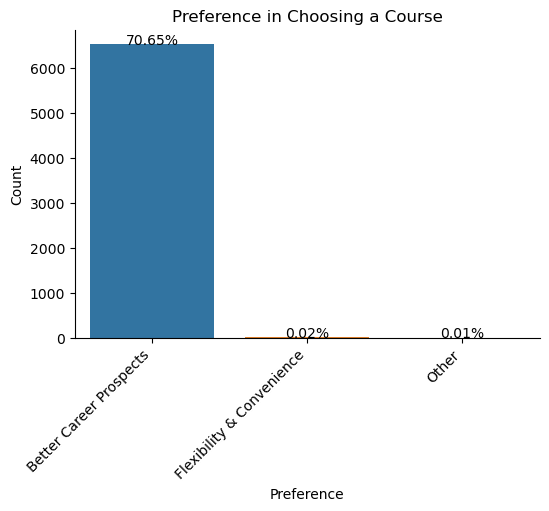

In [21]:
plt.figure(figsize=(6, 4))


ax = sns.countplot(x='What matters most to you in choosing a course', data=data)  
ax.set_title('Preference in Choosing a Course')
ax.set_xlabel('Preference')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
sns.despine()


total = len(data['What matters most to you in choosing a course'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()

In [22]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

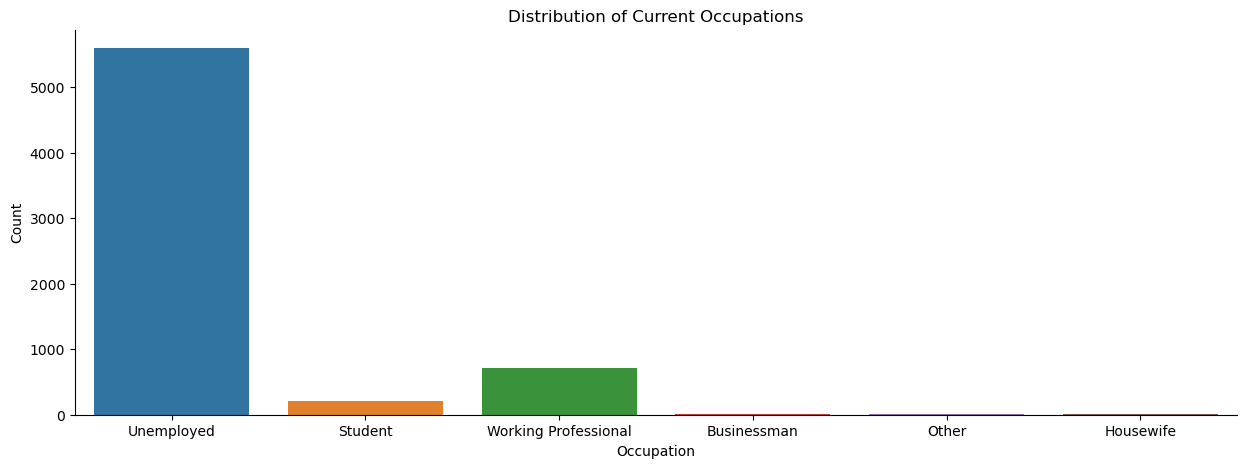

In [23]:
plt.figure(figsize=(15, 5))

sns.countplot(x='What is your current occupation', data=data) 
plt.title('Distribution of Current Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count') 
sns.despine()

plt.show()


**NOTE**: The majority of leads are categorized as 'Unemployed', but due to missing values indicating an unknown current occupation, we will impute these missing values with a new category labeled 'Other'.

In [24]:
data['What is your current occupation'].fillna('Other',inplace=True)

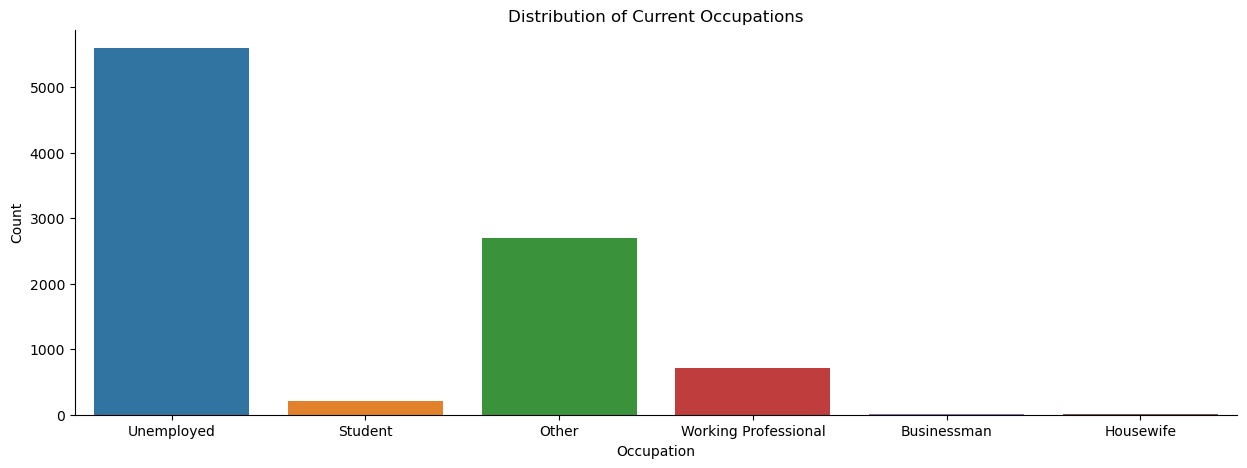

In [25]:
plt.figure(figsize=(15, 5))

sns.countplot(x='What is your current occupation', data=data) 
plt.title('Distribution of Current Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count') 
sns.despine()

plt.show()

In [26]:
data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

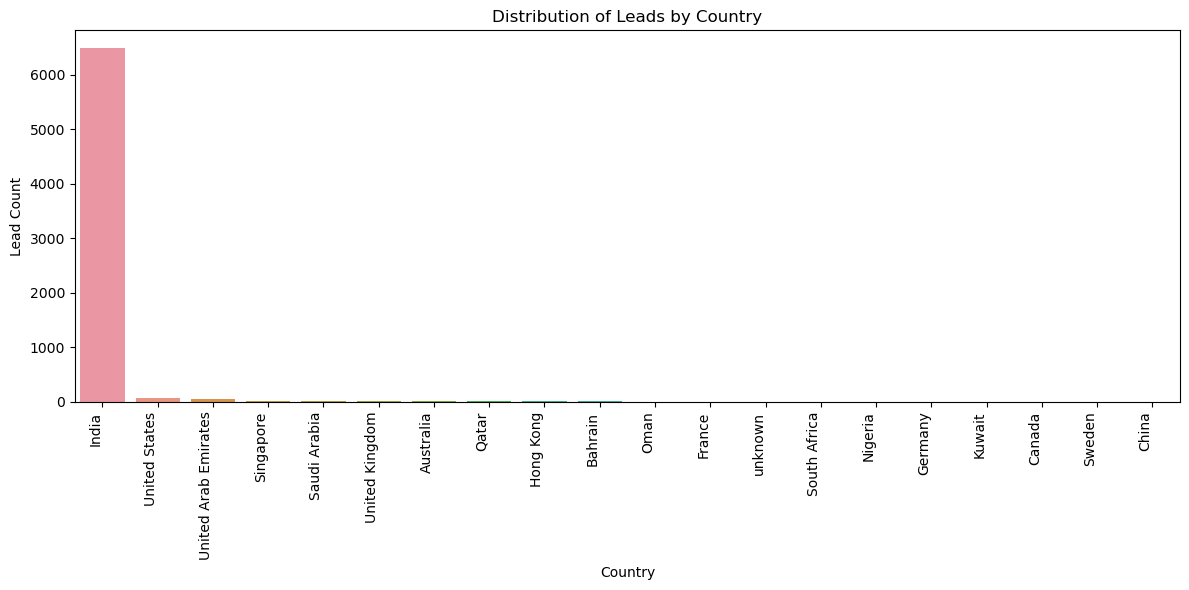

In [27]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index[:20]) #Limited the display to the top 20 countries by lead count for better focus.

plt.xticks(rotation=90, ha='right')

plt.title('Distribution of Leads by Country')
plt.xlabel('Country')
plt.ylabel('Lead Count')

plt.tight_layout()
plt.show()


**NOTE**: The countplot clearly indicates that India has the highest number of leads. Therefore, we can safely impute missing values in the country column with 'India'.

In [28]:
data.Country.fillna('India', inplace=True)

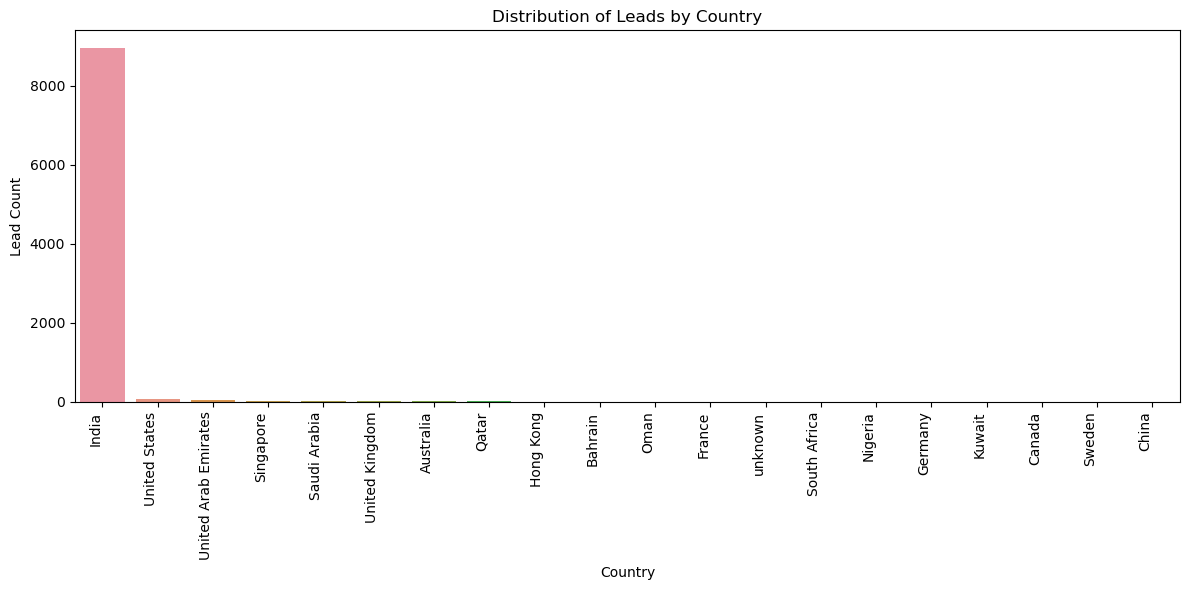

In [29]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index[:20]) 

plt.xticks(rotation=90, ha='right')

plt.title('Distribution of Leads by Country')
plt.xlabel('Country')
plt.ylabel('Lead Count')

plt.tight_layout()
plt.show()

**NOTE**: After imputing missing values, the lead count for India rises to approximately 9500, significantly outweighing other countries. This skewed distribution may not provide meaningful insights and could potentially bias the analysis. Hence, it is advisable to drop the 'India' category to ensure a more balanced dataset for analysis.

In [30]:
data.drop('Country',axis = 1, inplace=True)

In [31]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [32]:
data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

**NOTE**:

- There are Google and google in the data, it would be better to replace 'google' with "Google'.

- For missing values in the 'Source' column, we'll replace them with 'Google' since it's the most frequent entry.

In [33]:
data['Lead Source']=data['Lead Source'].replace('google','Google')

In [34]:
data['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [35]:
data['Lead Source'].fillna('Google', inplace=True)

In [36]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

**NOTE**: 'Email Opened' is the most frequent activity, we will impute the missing values with 'Email Opened'.

In [37]:
data['Last Activity'] = data['Last Activity'].replace(np.nan, 'Email Opened')

In [38]:
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)

data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)

In [39]:
data.shape

(9240, 27)

In [40]:
round(100*(data.isnull().sum().sort_values(ascending=False))/len(data), 2)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
Search                                            0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Prospect ID                                       0.00
Lead Number                                       0.00
What is your current occupation                   0.00
Last Activity                                     0.00
Page Views

In [41]:
data['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

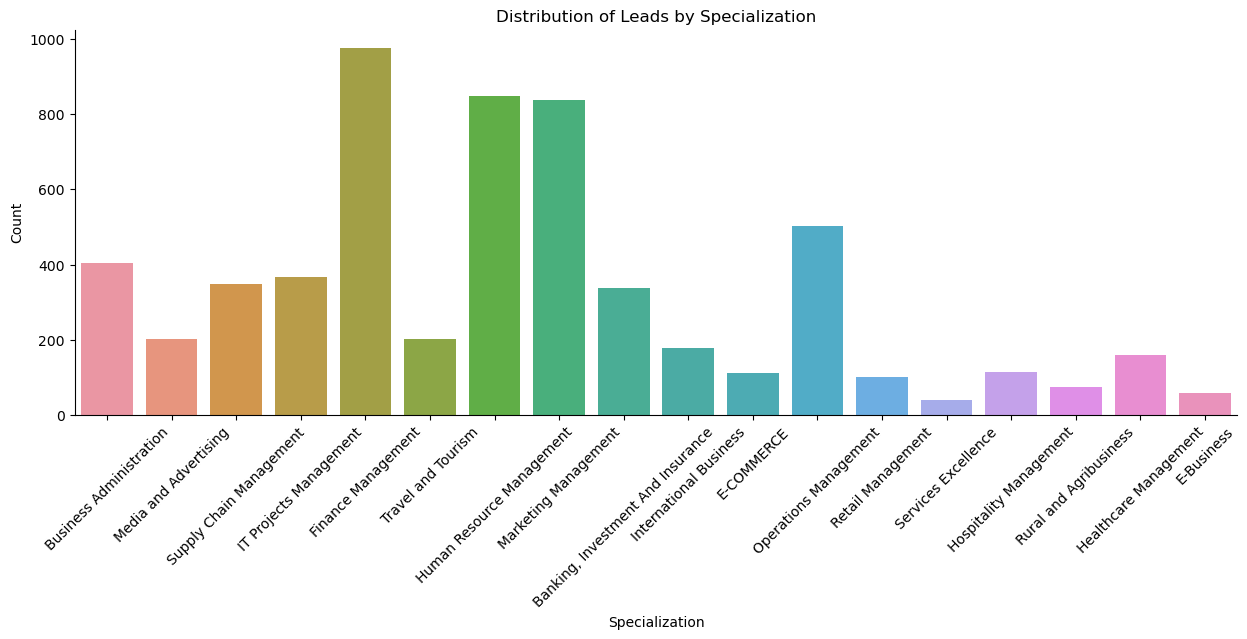

In [42]:
plt.figure(figsize=(15, 5))

data['Specialization'] = data['Specialization']

sns.countplot(x='Specialization', data=data) 
plt.title('Distribution of Leads by Specialization')
plt.xticks(rotation=45)
plt.xlabel('Specialization')
plt.ylabel('Count') 
sns.despine()

plt.show()

In [43]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [44]:
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

**NOTE**: We can seen that Better Career Prospects has 6528 times while the other two levels appear twice and once respectively. So we should fill missing value with this column as well.

In [45]:
data['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

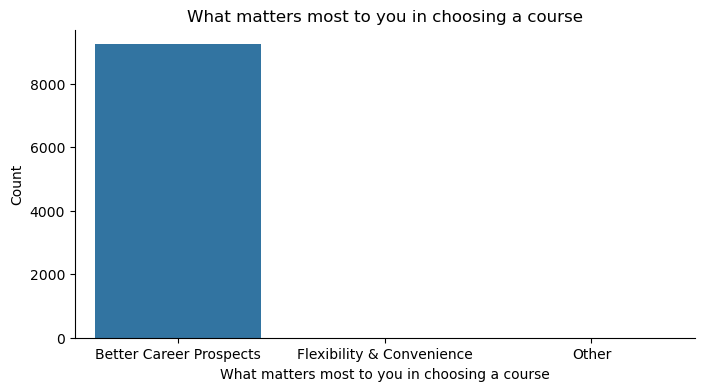

In [46]:
plt.figure(figsize=(8, 4))

data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course']

sns.countplot(x = 'What matters most to you in choosing a course', data=data) 
plt.title('What matters most to you in choosing a course')
plt.ylabel('Count') 
sns.despine()

plt.show()

In [47]:
round(100*(data.isnull().sum().sort_values(ascending=False))/len(data), 2)

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Specialization                                   0.0
Last Activity                                    0.0
Page Views Per Visit                          

In [48]:
data['Lead Number'].value_counts().sum() - len(data['Lead Number'].unique())

0

In [49]:
data['Prospect ID'].value_counts().sum() - len(data['Prospect ID'].unique())

0

In [50]:
data.drop(['Prospect ID','Lead Number'], axis=1,inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,...,No,No,No,No,No,No,No,No,No,Modified


In [51]:
for column in data.columns:
    print(column)
    print(data[column].value_counts(), '\n')

Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64 

Lead Source
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64 

Do Not Email
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

Do Not Call
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

Converted
Converted
0    5679
1    3561
Name: count, dtype: in

**NOTE**: As we can clearly seen in the value_counts data, there are some columns like 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','
Get updates on DM Content','I agree to pay the amount through cheque' may be not contribute significantly to analysis, hence it is better to drop them.

In [52]:
data.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'Last Notable Activity'],axis =1,inplace=True)

In [53]:
data.shape

(9240, 11)

In [54]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


### 4. Exploratory Data Analysis(EDA)

#### Univariate Analysis

In [55]:
data.shape

(9240, 11)

In [56]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.53896103896104

In [57]:
data['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

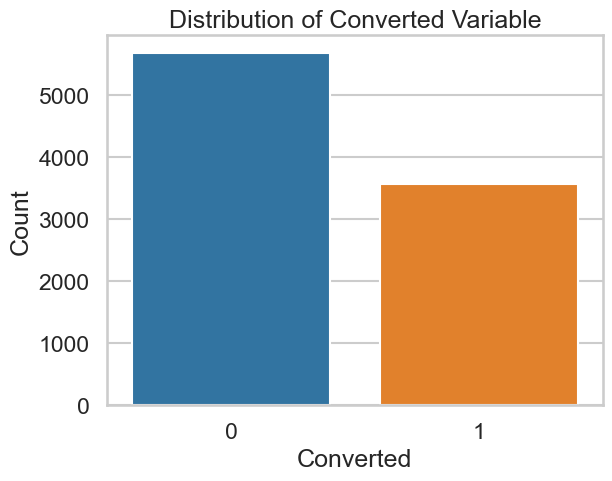

In [58]:
sns.set_style("whitegrid")
sns.set_context("talk")

sns.countplot(x='Converted', data=data)

plt.title('Distribution of Converted Variable')
plt.xlabel('Converted')
plt.ylabel('Count')

total = len(data['Converted'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


In [59]:
data['Converted'] = data['Converted'].astype(int)

conversion_ratio = (data.Converted==1).sum()/(data.Converted==0).sum()

In [60]:
conversion_ratio

0.6270470153195985

In [61]:
data.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

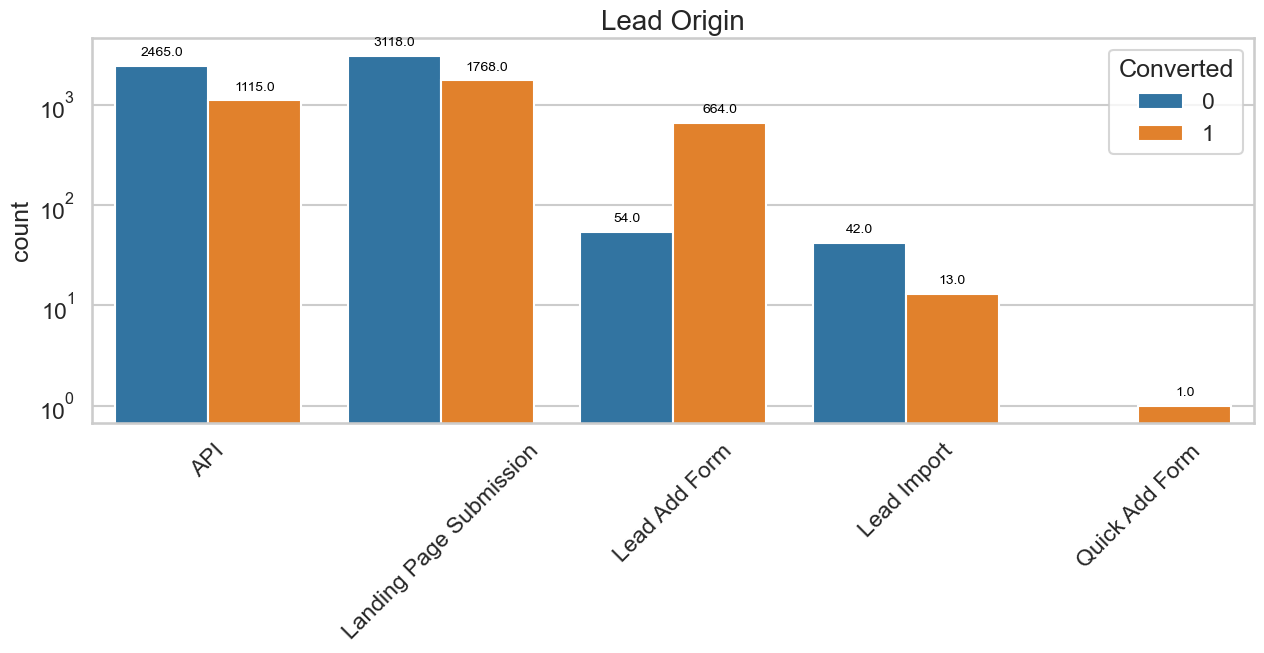

In [62]:
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Lead Origin", hue="Converted", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set(xlabel=None)
plt.xticks(rotation=45)
plt.title('Lead Origin', fontsize=20)
ax.set_yscale('log')

plt.show()


**NOTE**:

- The conversion rate for leads originating from 'API' is 2465, while for leads from 'Landing Page Submission' it's about 3118.  

- Leads generated from 'Lead Add Form' show a higher number of conversions compared to unsuccessful conversions.

- The count of leads imported ('Lead Import') is relatively lower.

Recommendation:

To enhance the overall lead conversion rate, it is advised to focus efforts on improving the conversion rates of leads from the 'API' and 'Landing Page Submission' origins. Additionally, there is a potential to increase lead generation from the 'Lead Add Form' source. These strategies can contribute to improving the overall effectiveness of lead conversion efforts.

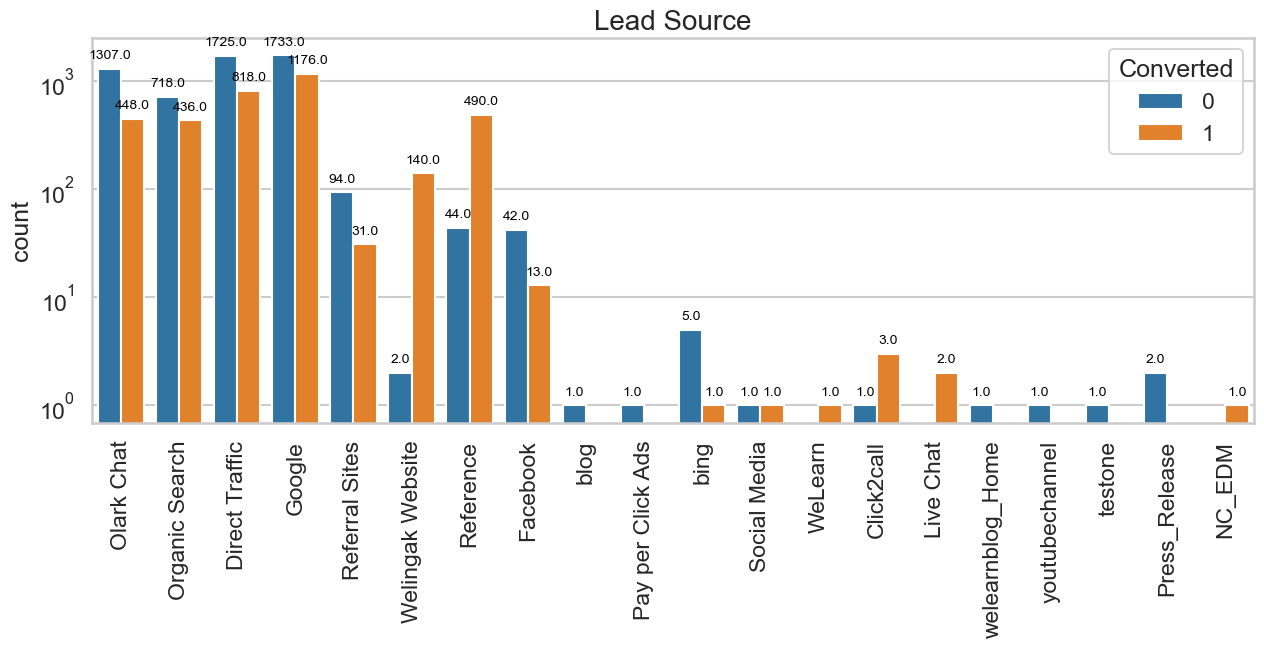

In [63]:
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Lead Source", hue="Converted", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set(xlabel=None)
plt.xticks(rotation=90)
plt.title('Lead Source', fontsize=20)
ax.set_yscale('log')

plt.show()

In [64]:
# Replace low-frequency values with 'Others' 

low_frequency_values = ['blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 
                        'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM']

data['Lead Source'] = data['Lead Source'].map(lambda x: 'Others' if x in low_frequency_values else x)

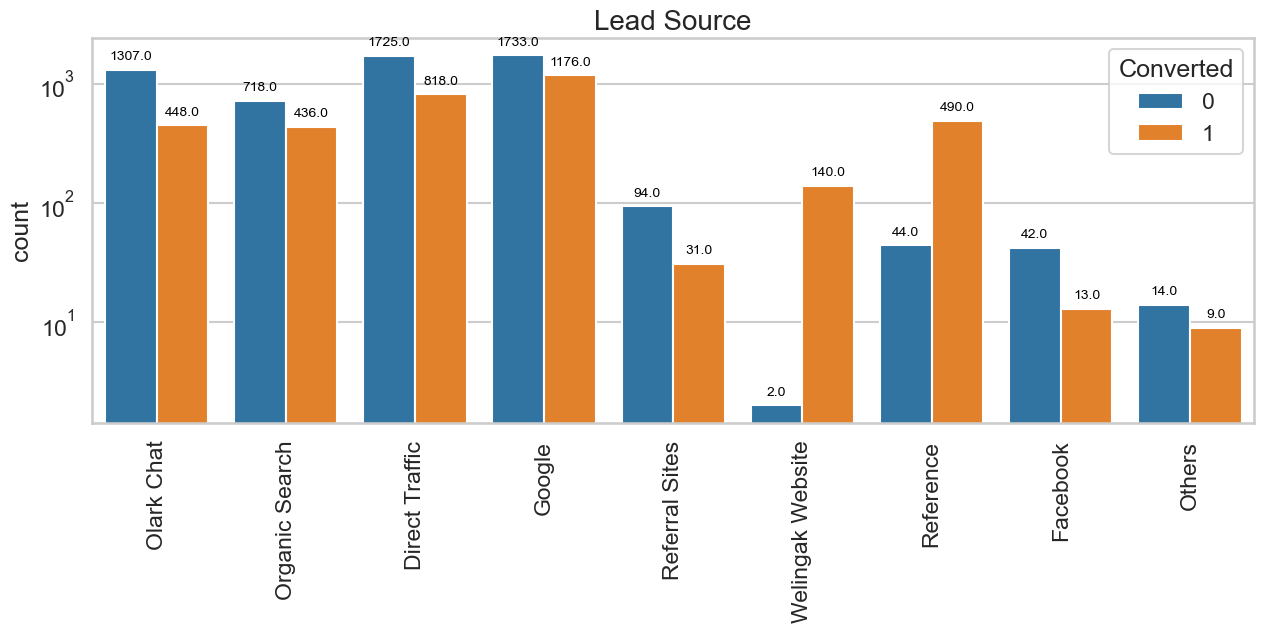

In [65]:
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Lead Source", hue="Converted", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set(xlabel=None)
plt.xticks(rotation=90)
plt.title('Lead Source', fontsize=20)
ax.set_yscale('log')

plt.show()

**NOTE**: 

- The highest number of leads is generated from Google, followed by Direct Traffic, with 1176 and 818 leads, respectively.

- The conversion rate of leads originating from 'Reference' and 'Welingak Website' is notably high.


Recommendation:
To enhance the overall lead conversion rate, prioritize efforts on improving lead conversion from Google, Direct Traffic, Olark Chata and Organic Search sources. Additionally, aim to increase lead generation from Reference and Welingak Website channels. These strategies can contribute significantly to improving the overall effectiveness of lead conversion initiatives.

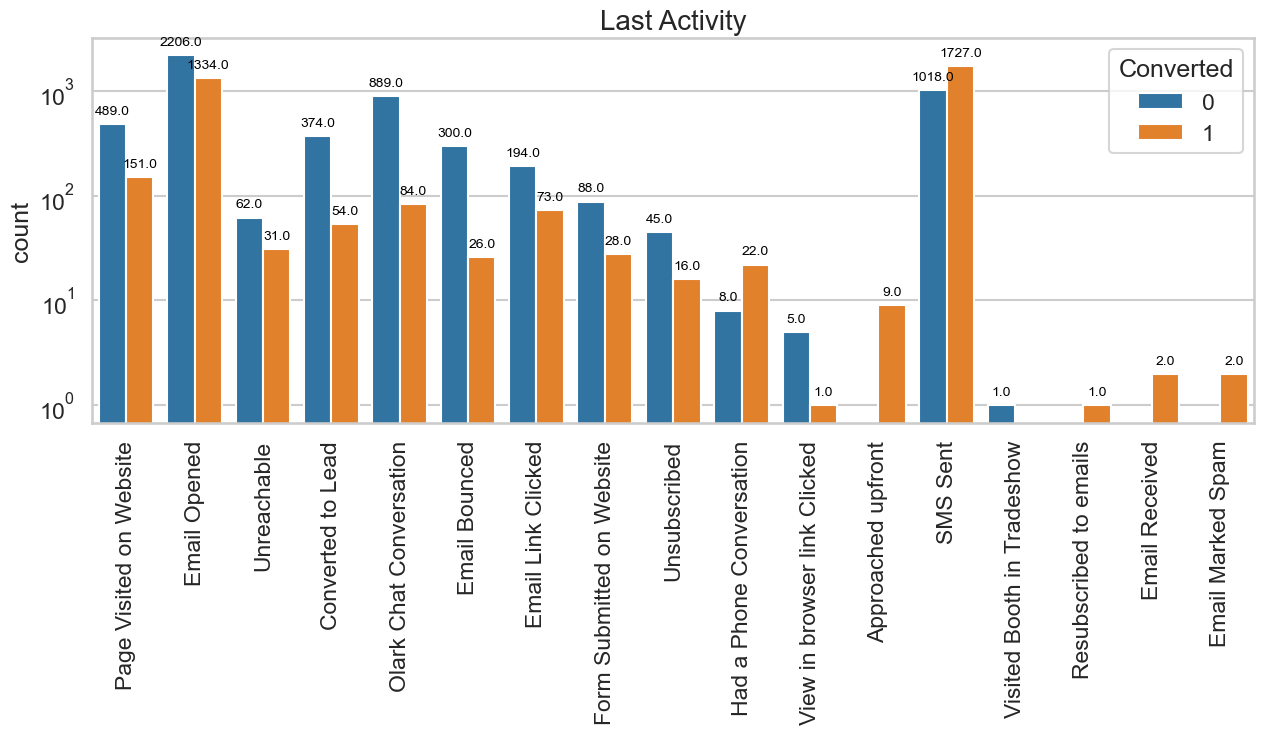

In [66]:
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Last Activity", hue="Converted", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set(xlabel=None)
plt.xticks(rotation=90)
plt.title('Last Activity', fontsize=20)
ax.set_yscale('log')

plt.show()

In [67]:
low_frequency_values = ['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam']

data['Last Activity'] = data['Last Activity'].map(lambda x: 'Others' if x in low_frequency_values else x)

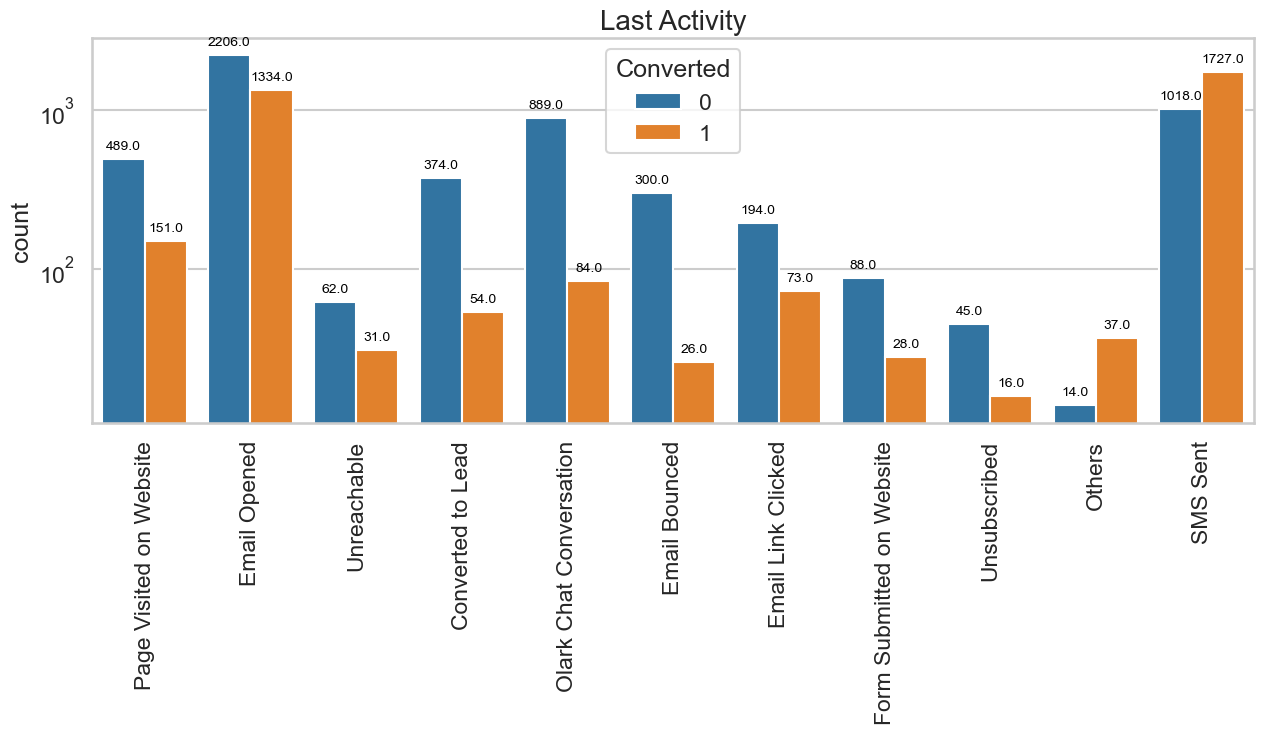

In [68]:
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Last Activity", hue="Converted", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set(xlabel=None)
plt.xticks(rotation=90)
plt.title('Last Activity', fontsize=20)
ax.set_yscale('log')

plt.show()

**NOTE**:

- The conversion rate for the last activity being 'SMS Sent' is approximately 1727. 

- The most common last interaction among leads is 'Email Opened'.

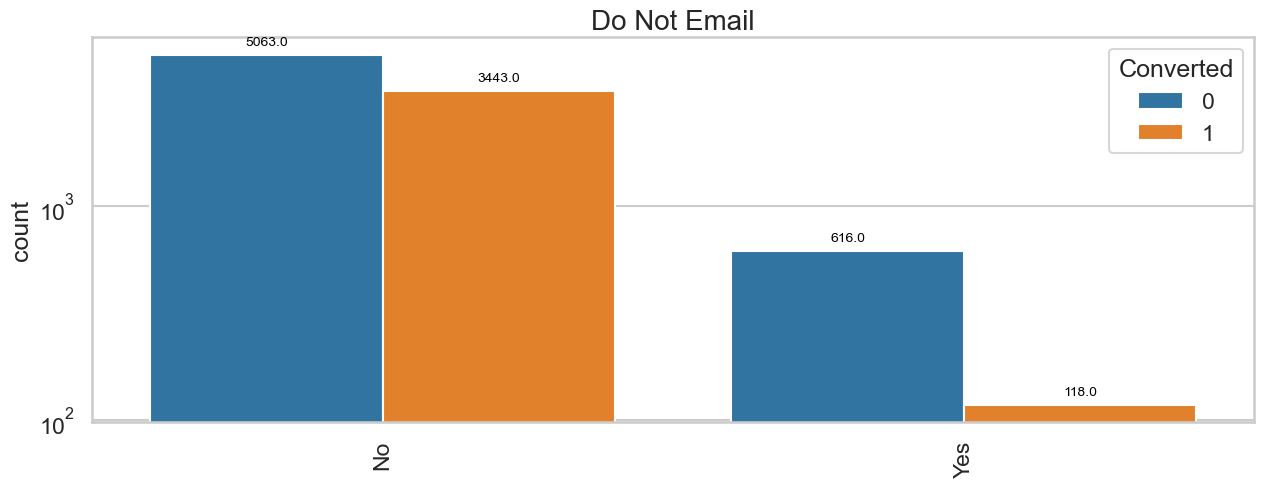

In [69]:
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Do Not Email", hue="Converted", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set(xlabel=None)
plt.xticks(rotation=90)
plt.title('Do Not Email', fontsize=20)
ax.set_yscale('log')

plt.show()

**NOTE**:

Those who opt out of email communication tend to convert into leads more frequently.

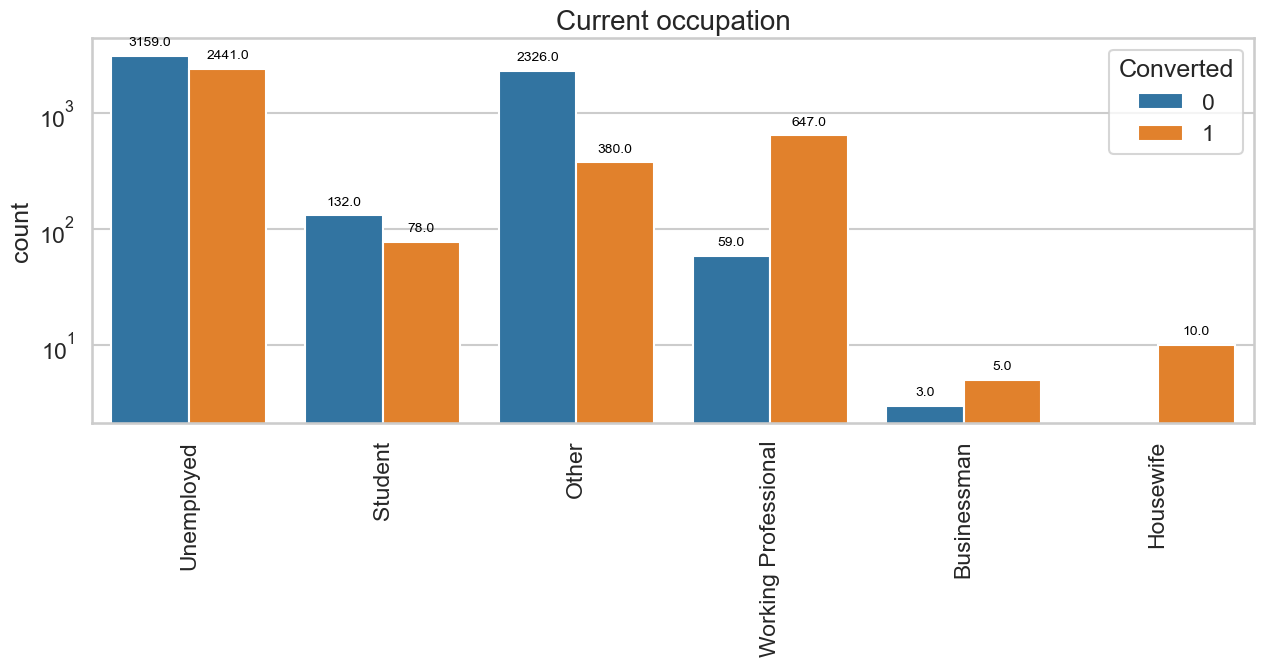

In [70]:
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="What is your current occupation", hue="Converted", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set(xlabel=None)
plt.xticks(rotation=90)
plt.title('Current occupation', fontsize=20)
ax.set_yscale('log')

plt.show()

**NOTE**:

- 'Unemployed' leads are generationg the most number of leads.

- Conversion rate is also higher for 'Working Professionals'.

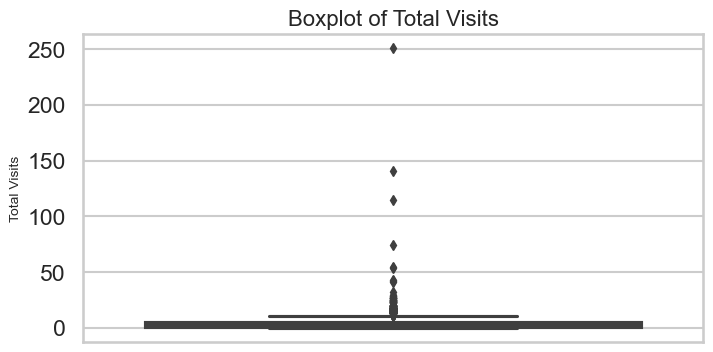

In [71]:
plt.figure(figsize=(8, 4))  

sns.boxplot(y=data['TotalVisits'], orient = 'v')  
  
plt.ylabel('Total Visits', fontsize=10)
plt.title('Boxplot of Total Visits', fontsize=16)

plt.show()


In [72]:
data.shape

(9240, 11)

In [73]:
Q99 = data['TotalVisits'].quantile(0.99)

data = data[(data.TotalVisits <= Q99)]

In [74]:
data.shape

(9157, 11)

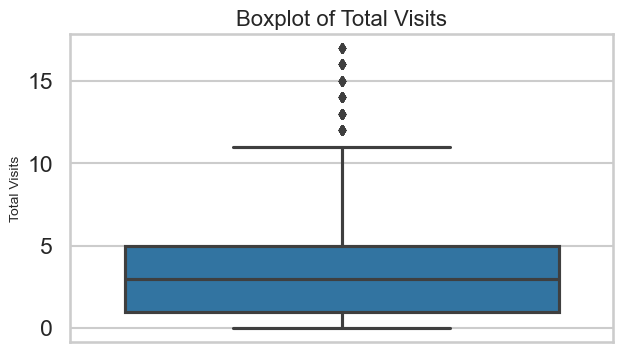

In [75]:
plt.figure(figsize = (7,4))
sns.boxplot(y=data['TotalVisits'])

plt.ylabel('Total Visits', fontsize=10)
plt.title('Boxplot of Total Visits', fontsize=16)

plt.show()

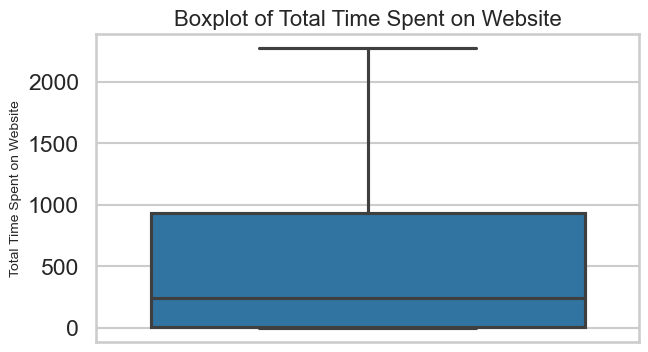

In [76]:
plt.figure(figsize = (7,4))
sns.boxplot(y=data['Total Time Spent on Website'])

plt.ylabel('Total Time Spent on Website', fontsize=10)
plt.title('Boxplot of Total Time Spent on Website', fontsize=16)

plt.show()

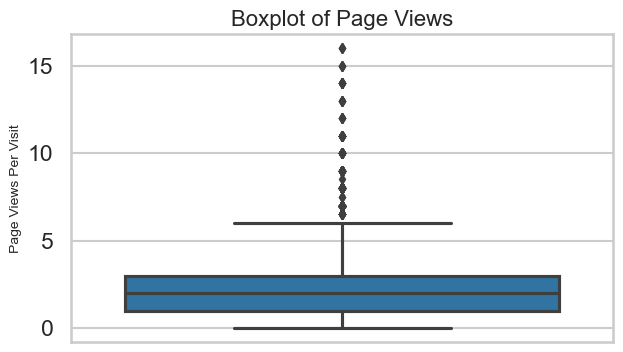

In [77]:
plt.figure(figsize = (7,4))
sns.boxplot(y=data['Page Views Per Visit'])

plt.ylabel('Page Views Per Visit', fontsize=10)
plt.title('Boxplot of Page Views', fontsize=16)

plt.show()

In [78]:
Q99 = data['Page Views Per Visit'].quantile(0.99)

data = data[(data['Page Views Per Visit'] <= Q99)]

In [79]:
data.shape

(9090, 11)

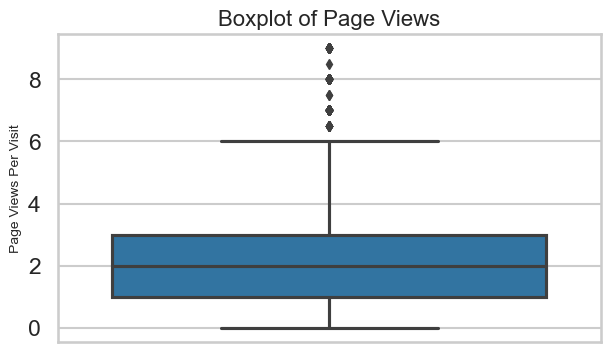

In [80]:
plt.figure(figsize = (7,4))
sns.boxplot(y=data['Page Views Per Visit'])

plt.ylabel('Page Views Per Visit', fontsize=10)
plt.title('Boxplot of Page Views', fontsize=16)

plt.show()

#### Bivariate Analysis 

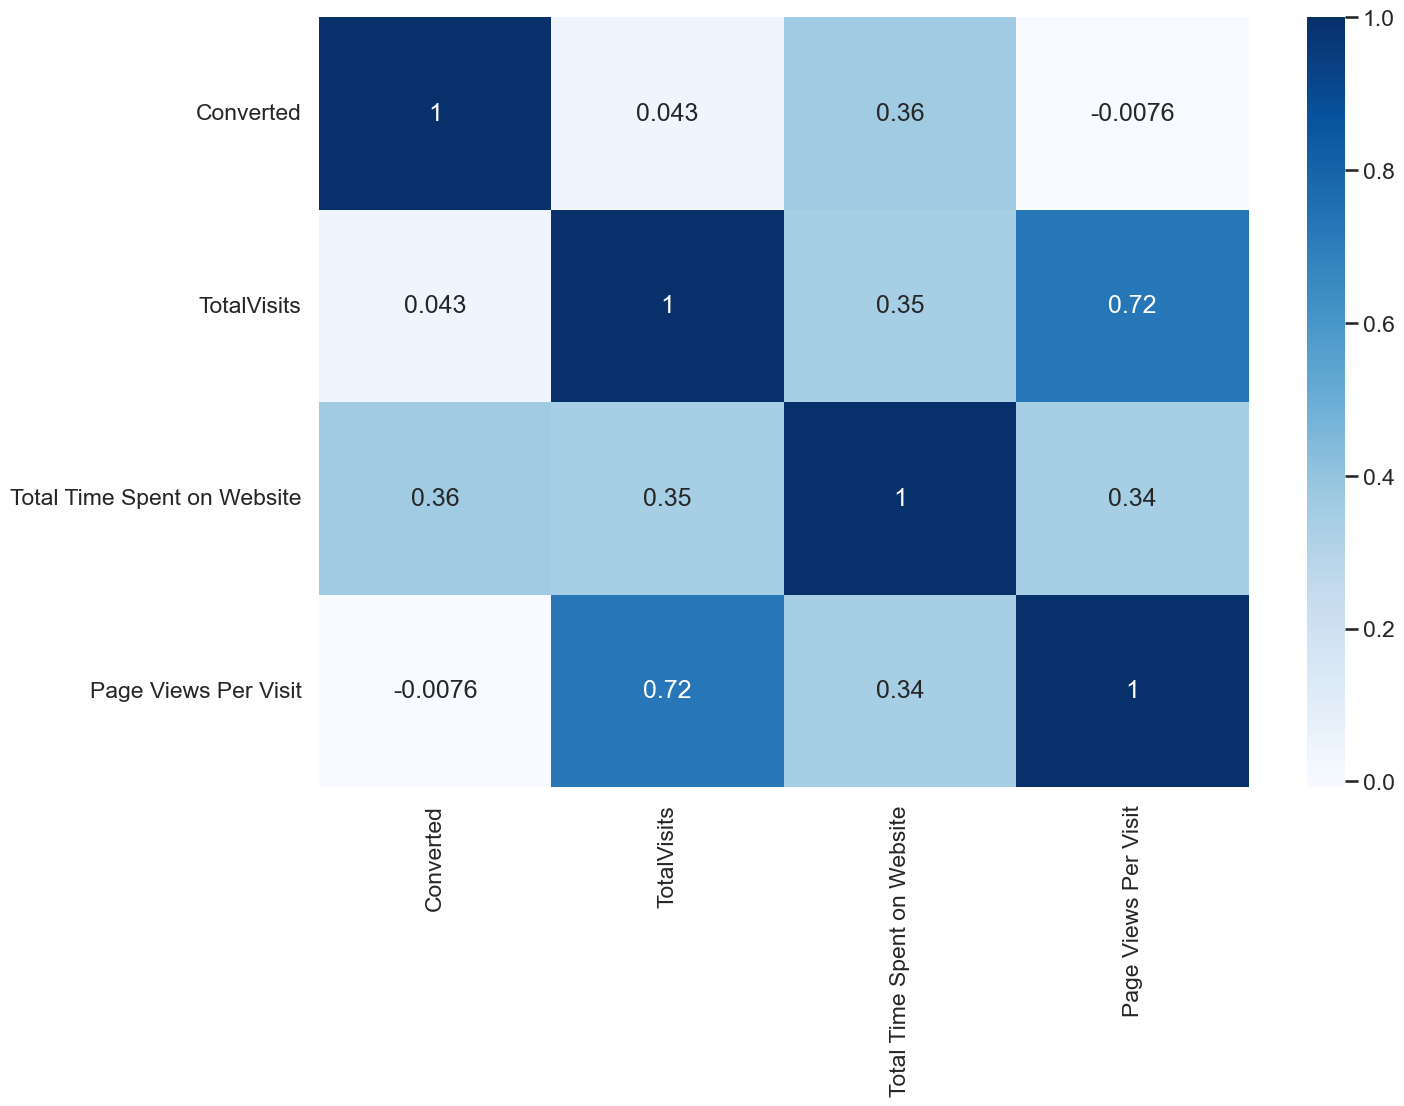

In [81]:
numeric_data = data.select_dtypes(include=['number']) 

plt.figure(figsize=(15, 10))        
ax = sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')
plt.show()

**NOTE**:

- 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of 0.82

- 'Total Time Spent on Website' has correlation of 0.35 with target variable 'Converted'

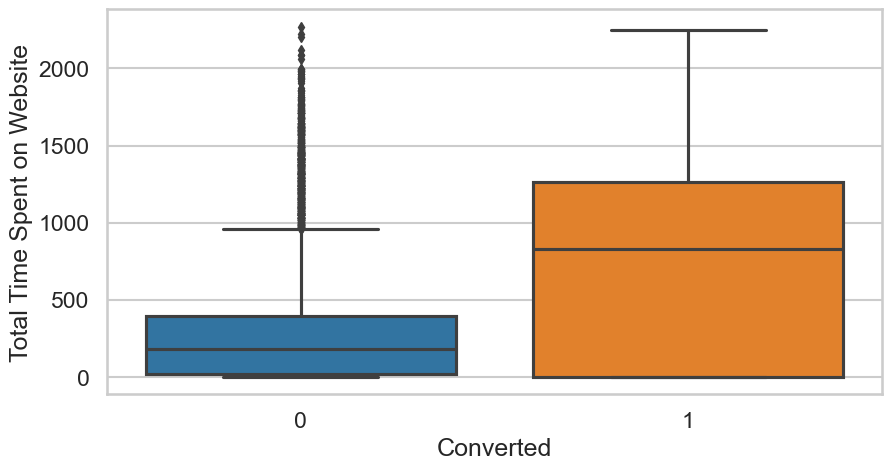

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=data)
plt.show()

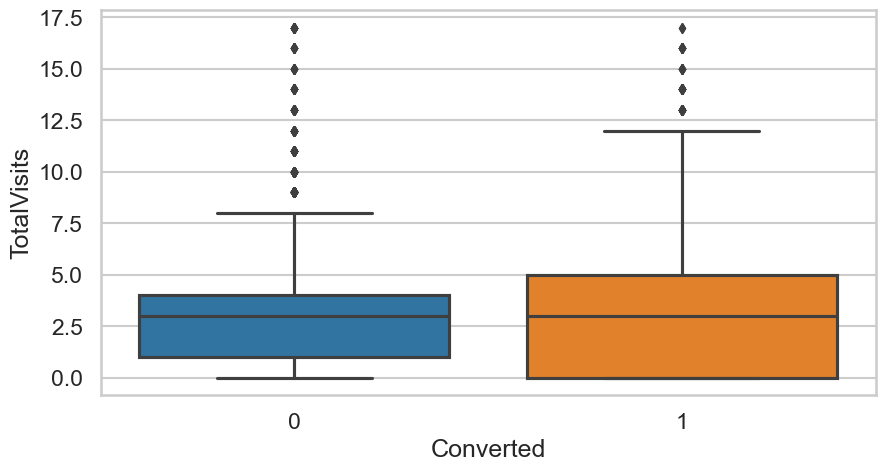

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Converted',y = 'TotalVisits', data = data)
plt.show()

### 5. Data Preparation 

In [84]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [85]:
data.shape

(9090, 11)

#### Converting binary variables 

In [86]:
var = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

data[var] = data[var].apply(binary_map)

In [87]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


#### Creating dummy variables 

In [88]:
data.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                                int64
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview      int64
dtype: object

In [89]:
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source',
       'Last Activity', 'Specialization', 'What is your current occupation']], drop_first=True)

dummy = dummy.astype(int)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
data= pd.concat([dummy,data],axis = 1)

In [91]:
data.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Specialization'], axis=1,inplace = True)

In [92]:
data.shape

(9090, 51)

### 6.  Split Dataset into Train and Test set

In [93]:
X = data.drop(['Converted'], axis=1)

In [94]:
y = data['Converted']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42  
)

In [96]:
print(X_train.shape, X_test.shape)

(6363, 50) (2727, 50)


### 7. Normalization

In [97]:
data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,2.0,1428,1.0,0


In [98]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
2401,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.309467,-0.747324,0.937088,0
6293,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,-1.088820,-0.883435,-1.194078,0
1393,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,-0.040105,-0.104881,-0.128495,0
301,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0.309467,0.196378,0.937088,0
7211,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.739248,0.720859,-0.661286,1


### 7. Build Model 

In [99]:
regressor = LogisticRegression()

rfe = RFE(estimator=regressor, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Origin_Quick Add Form', False, 28),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration', Fa

In [101]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [102]:
X_train = X_train[col]

#### Model 1 

In [103]:
X_train_model1 = sm.add_constant(X_train)
model1 = sm.GLM(y_train, X_train_model1, family = sm.families.Binomial()).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.7
Date:                Fri, 15 Mar 2024   Deviance:                       5201.3
Time:                        11:38:45   Pearson chi2:                 6.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3815      0.124     -3.077      0.002      -0.625      -0.138
Lead Origin_Landing Page Submission                     -0.8647      0.127     -6.810      0.000      -1.114      -0.616
Lead Origin_Lead Add Form                                2.9050      0.206     14.120      0.000       2.502       3.308
Lead Source_Olark Chat                                   1.2672      0.123     10.319      0.000       1.027       1.508
Lead Source_Welingak Website                             2.5092      0.746      3.365      0.001       1.048       3.971
Last Activity_Olark Chat Conversation                   -1.3808      0.170     -8.105      0.000      -1.715      -1.047
Last Activity_Others                                     0.9367      0.466      2.012      0.044       0.024       1.849
Last Activity_SMS Sent                                   1.3818      0.075     18.333      0.000       1.234       1.530
Last Activity_Unreachable                                0.4950      0.332      1.490      0.136      -0.156       1.146
Last Activity_Unsubscribed                               1.3110      0.500      2.621      0.009       0.331       2.291
Specialization_Others                                   -0.8055      0.121     -6.645      0.000      -1.043      -0.568
What is your current occupation_Housewife               22.8762   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
What is your current occupation_Other                   -1.1645      0.088    -13.211      0.000      -1.337      -0.992
What is your current occupation_Working Professional     2.1495      0.181     11.887      0.000       1.795       2.504
Do Not Email                                            -1.4939      0.174     -8.601      0.000      -1.834      -1.153
Total Time Spent on Website                              1.1094      0.041     27.377      0.000       1.030       1.189
========================================================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.21
2,Lead Source_Olark Chat,2.05
0,Lead Origin_Landing Page Submission,1.62
11,What is your current occupation_Other,1.60
6,Last Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.49
4,Last Activity_Olark Chat Conversation,1.47
3,Lead Source_Welingak Website,1.30
14,Total Time Spent on Website,1.25
12,What is your current occupation_Working Profes...,1.19


In [105]:
X_train.drop(["What is your current occupation_Housewife"], axis = 1, inplace=True)

#### Model 2 

In [106]:
X_train_model2 = sm.add_constant(X_train)
model2 = sm.GLM(y_train, X_train_model2, family=sm.families.Binomial()).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.9
Date:                Fri, 15 Mar 2024   Deviance:                       5211.9
Time:                        11:38:46   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3743      0.124     -3.023      0.003      -0.617      -0.132
Lead Origin_Landing Page Submission                     -0.8626      0.127     -6.803      0.000      -1.111      -0.614
Lead Origin_Lead Add Form                                2.9084      0.206     14.148      0.000       2.505       3.311
Lead Source_Olark Chat                                   1.2657      0.123     10.311      0.000       1.025       1.506
Lead Source_Welingak Website                             2.5040      0.746      3.358      0.001       1.043       3.965
Last Activity_Olark Chat Conversation                   -1.3837      0.170     -8.123      0.000      -1.718      -1.050
Last Activity_Others                                     0.9311      0.466      2.000      0.046       0.018       1.844
Last Activity_SMS Sent                                   1.3756      0.075     18.267      0.000       1.228       1.523
Last Activity_Unreachable                                0.4885      0.332      1.470      0.142      -0.163       1.140
Last Activity_Unsubscribed                               1.3077      0.500      2.614      0.009       0.327       2.288
Specialization_Others                                   -0.8088      0.121     -6.678      0.000      -1.046      -0.571
What is your current occupation_Other                   -1.1679      0.088    -13.255      0.000      -1.341      -0.995
What is your current occupation_Working Professional     2.1433      0.181     11.855      0.000       1.789       2.498
Do Not Email                                            -1.4971      0.174     -8.623      0.000      -1.837      -1.157
Total Time Spent on Website                              1.1087      0.040     27.390      0.000       1.029       1.188
========================================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.21
2,Lead Source_Olark Chat,2.05
0,Lead Origin_Landing Page Submission,1.61
10,What is your current occupation_Other,1.60
6,Last Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.49
4,Last Activity_Olark Chat Conversation,1.47
3,Lead Source_Welingak Website,1.30
13,Total Time Spent on Website,1.25
11,What is your current occupation_Working Profes...,1.19


In [108]:
X_train = X_train.drop(["Last Activity_Others"], axis = 1)

#### Model 3 

In [109]:
X_train_model3 = sm.add_constant(X_train)
model3 = sm.GLM(y_train, X_train_model3, family=sm.families.Binomial()).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.0
Date:                Fri, 15 Mar 2024   Deviance:                       5215.9
Time:                        11:38:46   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3610      0.124     -2.920      0.003      -0.603      -0.119
Lead Origin_Landing Page Submission                     -0.8687      0.127     -6.853      0.000      -1.117      -0.620
Lead Origin_Lead Add Form                                2.9148      0.206     14.182      0.000       2.512       3.318
Lead Source_Olark Chat                                   1.2633      0.123     10.298      0.000       1.023       1.504
Lead Source_Welingak Website                             2.4884      0.746      3.338      0.001       1.027       3.950
Last Activity_Olark Chat Conversation                   -1.3933      0.170     -8.181      0.000      -1.727      -1.060
Last Activity_SMS Sent                                   1.3670      0.075     18.188      0.000       1.220       1.514
Last Activity_Unreachable                                0.4797      0.332      1.443      0.149      -0.172       1.131
Last Activity_Unsubscribed                               1.2968      0.500      2.592      0.010       0.316       2.277
Specialization_Others                                   -0.8107      0.121     -6.695      0.000      -1.048      -0.573
What is your current occupation_Other                   -1.1700      0.088    -13.285      0.000      -1.343      -0.997
What is your current occupation_Working Professional     2.1556      0.181     11.917      0.000       1.801       2.510
Do Not Email                                            -1.4944      0.173     -8.619      0.000      -1.834      -1.155
Total Time Spent on Website                              1.1081      0.040     27.392      0.000       1.029       1.187
========================================================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Others,2.21
2,Lead Source_Olark Chat,2.05
0,Lead Origin_Landing Page Submission,1.61
9,What is your current occupation_Other,1.60
5,Last Activity_SMS Sent,1.51
1,Lead Origin_Lead Add Form,1.49
4,Last Activity_Olark Chat Conversation,1.47
3,Lead Source_Welingak Website,1.30
12,Total Time Spent on Website,1.25
10,What is your current occupation_Working Profes...,1.19


### 8. Prediction on Training Dataset

In [111]:
y_train_pred = model3.predict(sm.add_constant(X_train))
y_train_pred[:10]

2401    0.134606
6293    0.291650
1393    0.983940
301     0.266561
7211    0.995963
8739    0.174064
1536    0.949880
8343    0.935093
6156    0.983098
1664    0.171763
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13460562, 0.29165038, 0.98394003, 0.2665615 , 0.99596261,
       0.17406356, 0.94987966, 0.9350935 , 0.98309828, 0.17176287])

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.134606
1,0,0.291650
2,1,0.983940
3,1,0.266561
4,1,0.995963


In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.134606,0
1,0,0.291650,0
2,1,0.983940,1
3,1,0.266561,0
4,1,0.995963,1


### 9. Finding Optimal Cutoff Point 

In [115]:
thresholds = np.array([float(x)/10 for x in range(10)])
y_train_pred_final[thresholds] = (y_train_pred_final['Converted_Prob'].values[:, np.newaxis] > thresholds).astype(int)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134606,0,1,1,0,0,0,0,0,0,0,0
1,0,0.291650,0,1,1,1,0,0,0,0,0,0,0
2,1,0.983940,1,1,1,1,1,1,1,1,1,1,1
3,1,0.266561,0,1,1,1,0,0,0,0,0,0,0
4,1,0.995963,1,1,1,1,1,1,1,1,1,1,1


In [116]:
cutoffs = np.arange(0, 1.1, 0.1)

def calculate_metrics(cutoff):
    y_pred = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > cutoff else 0)
    confusion = confusion_matrix(y_train_pred_final['Converted'], y_pred)
    accuracy = np.mean(y_pred == y_train_pred_final['Converted'])
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
    return (cutoff, accuracy, sensitivity, specificity)

cutoff_metrics = [calculate_metrics(cutoff) for cutoff in cutoffs]

cutoff_df = pd.DataFrame(cutoff_metrics, columns=['prob', 'accuracy', 'sensi', 'speci'])

cutoff_df

,prob,accuracy,sensi,speci
0,0.0,0.386767,1.000000,0.000000
1,0.1,0.602074,0.985778,0.360072
2,0.2,0.766148,0.923608,0.666838
3,0.3,0.796637,0.852905,0.761148
4,0.4,0.811253,0.775701,0.833675
5,0.5,0.811724,0.699309,0.882624
6,0.6,0.801352,0.629825,0.909534
7,0.7,0.778406,0.516457,0.943619
8,0.8,0.757819,0.427062,0.966427
9,0.9,0.707842,0.261682,0.989236


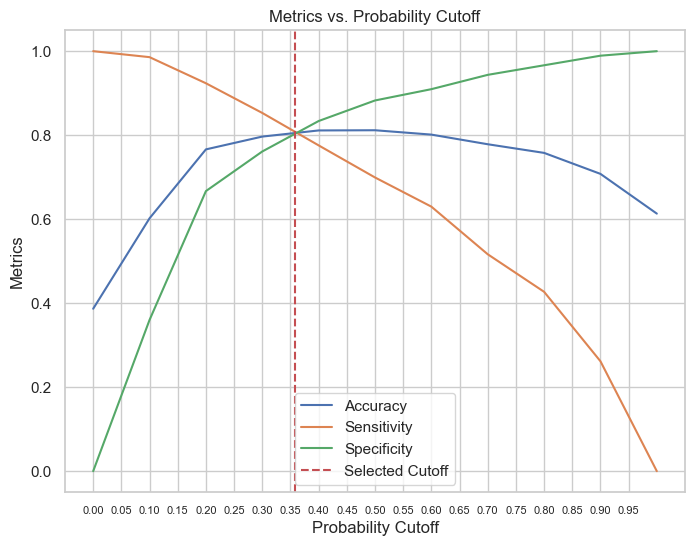

In [117]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.lineplot(data=cutoff_df, x='prob', y='accuracy', label='Accuracy')
sns.lineplot(data=cutoff_df, x='prob', y='sensi', label='Sensitivity')
sns.lineplot(data=cutoff_df, x='prob', y='speci', label='Specificity')

plt.axvline(x=0.358, color='r', linestyle='--', label='Selected Cutoff')

plt.xticks(np.arange(0, 1, step=0.05), size=8)

plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.title('Metrics vs. Probability Cutoff')
plt.legend()

plt.show()

**NOTE**: Based on the chart above, it appears that the optimal cutofff point is approximately 0.358.

### 10. Evaluation on Train Dataset

#### Confusion Matrix

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.134606,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.291650,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.983940,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.266561,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.995963,1,1,1,1,1,1,1,1,1,1,1,1


In [119]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [120]:
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,final_predicted
0,0,0.134606,0,0
1,0,0.291650,0,0
2,1,0.983940,1,1
3,1,0.266561,0,0
4,1,0.995963,1,1


In [121]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [122]:
y_train_pred_final['Prospect ID'] = y_train.index

In [123]:
y_train_pred_final = y_train_pred_final[['Prospect ID','Converted','Converted_Prob','final_predicted','Lead_Score']]

In [124]:
y_train_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,2401,0,0.134606,0,13
1,6293,0,0.291650,0,29
2,1393,1,0.983940,1,98
3,301,1,0.266561,0,27
4,7211,1,0.995963,1,100


In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3141,  761],
       [ 487, 1974]])

In [126]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8038661008958039


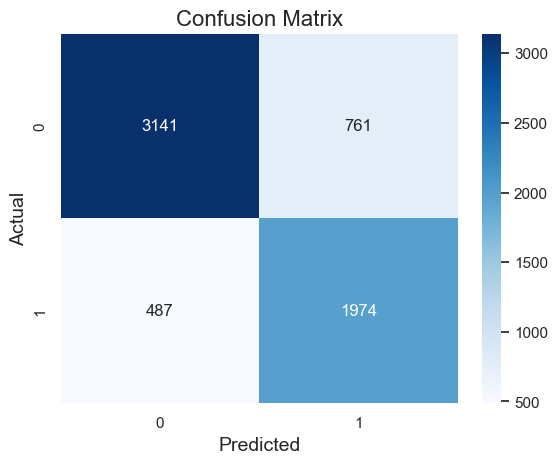

In [127]:
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

#### ROC Curve

In [128]:
precision = precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

print("Precision Score:", precision)

recall = recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

print("Recall Score:", recall)

Precision Score: 0.7217550274223035
Recall Score: 0.8021129622104836


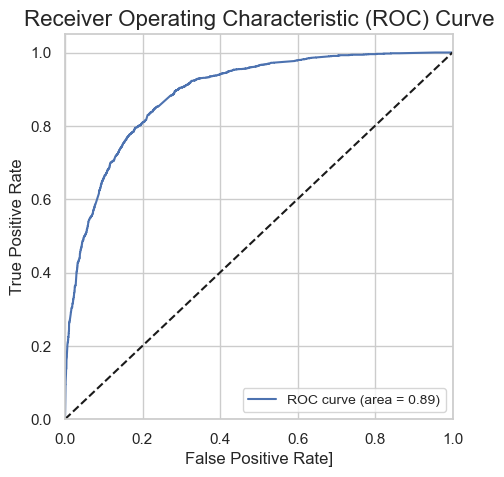

In [129]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
auc_score = roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate]', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=10)

plt.show()

**NOTE**: We obtained a high precision score of 0.89, suggesting that our predictive model performs well.

#### Precision and recall tradeoff

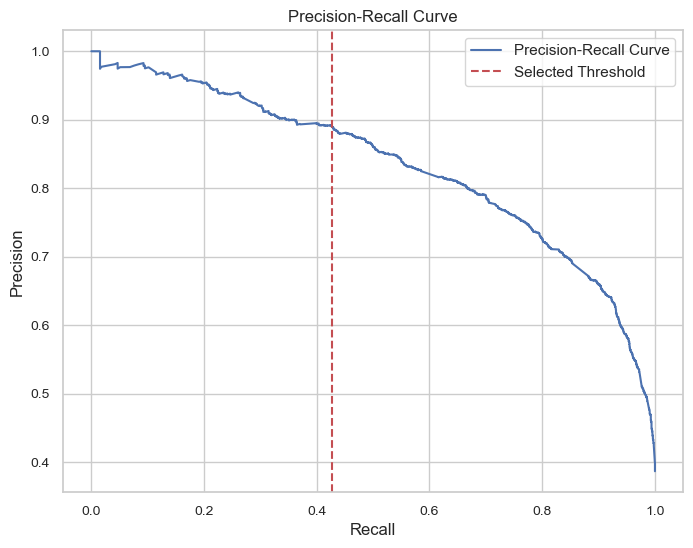

In [130]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axvline(x=0.427, color='r', linestyle='--', label='Selected Threshold')
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc='best')
plt.show()


In [131]:
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() 

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score,final_predicted_2
0,2401,0,0.134606,0,13,0
1,6293,0,0.291650,0,29,0
2,1393,1,0.983940,1,98,1
3,301,1,0.266561,0,27,0
4,7211,1,0.995963,1,100,1


In [132]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
confusion_2

array([[3307,  595],
       [ 605, 1856]])

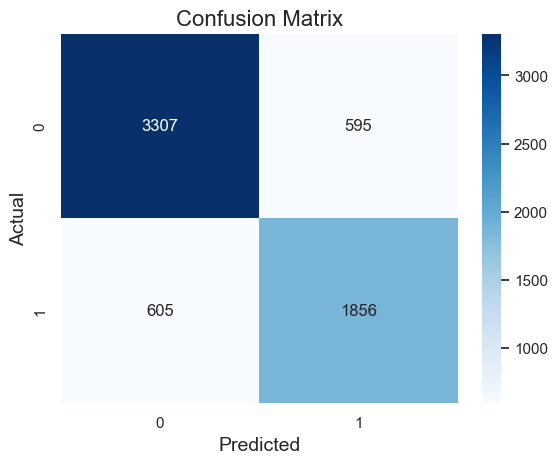

In [133]:
sns.heatmap(confusion_2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [134]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8114097123998114

In [135]:
precision = precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_2'])

print("Precision Score:", precision)

recall = recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_2'])

print("Recall Score:", recall)

Precision Score: 0.7572419420644635
Recall Score: 0.7541649735879724


**NOTE**: Using the Precision-Recall tradeoff curve, we observed a decrease in Recall for this particular point. Since increasing Recall is essential for capturing more True Positives, we opt to use the cutoff point at 0.358 as it offers better performance in this regard.

### 11. Prediction on Test Dataset

In [136]:
data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,2.0,1428,1.0,0


In [137]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [138]:
test_col = X_train_model3.columns

X_test=X_test[test_col[1:]]
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 3343 to 2755
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2727 non-null   float64
 1   Lead Origin_Landing Page Submission                   2727 non-null   int64  
 2   Lead Origin_Lead Add Form                             2727 non-null   int64  
 3   Lead Source_Olark Chat                                2727 non-null   int64  
 4   Lead Source_Welingak Website                          2727 non-null   int64  
 5   Last Activity_Olark Chat Conversation                 2727 non-null   int64  
 6   Last Activity_SMS Sent                                2727 non-null   int64  
 7   Last Activity_Unreachable                             2727 non-null   int64  
 8   Last Activity_Unsubscribed                            2727 n

In [139]:
y_test_pred = model3.predict((X_test))
y_test_pred[:10]

3343    0.291650
2600    0.831384
3115    0.071076
1348    0.030747
4525    0.929494
461     0.048855
1079    0.930141
7339    0.030747
6291    0.120742
1672    0.075699
dtype: float64

In [140]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
y_pred_1.head()

,0
3343,0.291650
2600,0.831384
3115,0.071076
1348,0.030747
4525,0.929494


In [142]:
y_test_pred_df = pd.DataFrame(y_test)

In [143]:
y_test_pred_df['Prospect ID'] = y_test_pred_df.index

In [144]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_pred_df.reset_index(drop=True, inplace=True)

In [145]:
y_test_predict_final = pd.concat([y_test_pred_df, y_pred_1], axis=1)

In [146]:
y_test_predict_final.head()

,Converted,Prospect ID,0
0,1,3343,0.291650
1,1,2600,0.831384
2,0,3115,0.071076
3,0,1348,0.030747
4,1,4525,0.929494


In [147]:
y_test_predict_final= y_test_predict_final.rename(columns={ 0 : 'Converted_Prob'})

In [148]:
y_test_predict_final = y_test_predict_final[['Prospect ID','Converted','Converted_Prob']]

In [149]:
y_test_predict_final.head()

,Prospect ID,Converted,Converted_Prob
0,3343,1,0.291650
1,2600,1,0.831384
2,3115,0,0.071076
3,1348,0,0.030747
4,4525,1,0.929494


In [150]:
y_test_predict_final['Lead_Score'] = y_test_predict_final.Converted_Prob.map( lambda x: round(x*100))

In [151]:
y_test_predict_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,3343,1,0.291650,29
1,2600,1,0.831384,83
2,3115,0,0.071076,7
3,1348,0,0.030747,3
4,4525,1,0.929494,93


In [152]:
y_test_predict_final['final_Predicted'] = y_test_predict_final.Converted_Prob.map(lambda x: 1 if x > 0.358 else 0)

In [153]:
y_test_predict_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_Predicted
0,3343,1,0.291650,29,0
1,2600,1,0.831384,83,1
2,3115,0,0.071076,7,0
3,1348,0,0.030747,3,0
4,4525,1,0.929494,93,1


### 12. Evaluation on Test Dataset 

In [154]:
confusion_test = metrics.confusion_matrix(y_test_predict_final.Converted, y_test_predict_final.final_Predicted )
confusion_test

array([[1377,  316],
       [ 189,  845]])

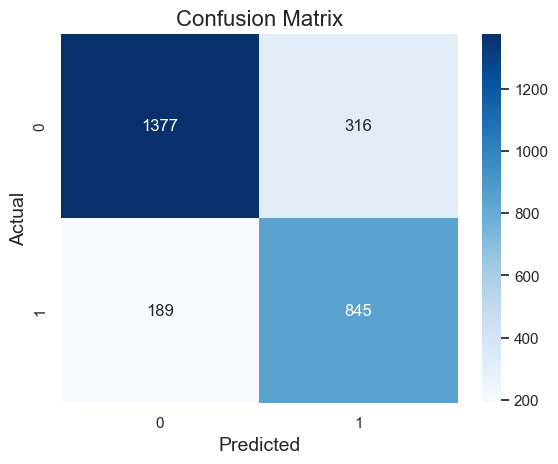

In [155]:
sns.heatmap(confusion_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [156]:
precision = precision_score(y_test_predict_final['Converted'], y_test_predict_final['final_Predicted'])

print("Precision Score:", precision)

recall = recall_score(y_test_predict_final['Converted'], y_test_predict_final['final_Predicted'])

print("Recall Score:", recall)

Precision Score: 0.7278208440999139
Recall Score: 0.8172147001934236


**NOTE**: The recall value for the test dataset is approximately 82%, which is comparable to the recall value of around 80% observed for the training dataset. Additionally, the accuracy value is close to 80%. These results indicate that the model performs well on the test dataset also.